In [ ]:
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import shutil
from PIL import Image 
import PIL

In [ ]:
trainDataFrame = pd.read_json('./data/train/metadata.json').T
trainDataFrame.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [ ]:
len(trainDataFrame)

400

In [ ]:
def isDirectoryEmpty(path):
    dir = os.listdir(path)
    if len(dir) == 0:
        return True
    else:
        return False

In [ ]:
all_dir_path = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\all_videos"
fake_dir_path = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\fake_videos"
real_dir_path = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\real_videos"

if isDirectoryEmpty(fake_dir_path) and isDirectoryEmpty(real_dir_path):
    for i in range(len(trainDataFrame)):
        if trainDataFrame.iloc[i].label == 'FAKE':
            file_name = trainDataFrame.iloc[i].name

            original = os.path.join(all_dir_path, file_name)
            target   = os.path.join(fake_dir_path, file_name)
            shutil.copyfile(original, target)

        if trainDataFrame.iloc[i].label == 'REAL':
            file_name = trainDataFrame.iloc[i].name

            original = os.path.join(all_dir_path, file_name)
            target   = os.path.join(real_dir_path, file_name)
            shutil.copyfile(original, target)
else:
    print("Directories are not empty")

Directories are not empty


In [ ]:
def saveToFolder(pathToSave, counter, image, x, y, w, h):
    new_path = os.path.join(pathToSave, str(counter) + '.jpg')
    print("Image saved to {}".format(new_path))
    cv2.imwrite(new_path, image[y:y+h, x:x+w])

In [ ]:
def face_detection_and_save_image(image, counter, pathToSaveFile, path_to_save_video):
    file_name = 'haarcascade_frontalface_alt.xml'
    lib_dir_path = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\venv\Lib\site-packages\cv2\data"
    face_cascade_path = original = os.path.join(lib_dir_path, file_name)
    face_cascade = cv2.CascadeClassifier(face_cascade_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    
    for (x,y,w,h) in faces:
        saveToFolder(pathToSaveFile, counter, image, x, y, w ,h)
        saveToFolder(path_to_save_video, counter, image, x, y, w ,h)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        
    return image

In [ ]:
def save_faces_from_video(dir_path, parent_path_to_save_video, pathToSaveFile):
    list_files = os.listdir(dir_path)
    counter = 0
    for file in list_files:
        file_directory = file[1:-4]
        print(file)
        print("Cut string: {}".format(file[1:-4]))
        path_to_save_video = os.path.join(parent_path_to_save_video, file_directory)
        os.makedirs(path_to_save_video)
        print("Directory {} created".format(file_directory))
        path = os.path.join(dir_path, file)
        
        vidcap = cv2.VideoCapture(path)
        success, image = vidcap.read()
        while success:
            counter = counter + 1
            print(counter)
            ret, frame = vidcap.read()
            if frame is not None:
                frame = face_detection_and_save_image(frame, counter, pathToSaveFile, path_to_save_video)
            else: 
                break

In [ ]:
dir_path = os.path.join(r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\fake_videos")
parent_path_to_save_video = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\fake_faces_in_videos"
pathToSaveFile = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\fake_faces_from_images"
if isDirectoryEmpty(pathToSaveFile) and isDirectoryEmpty(parent_path_to_save_video):
    save_faces_from_video(dir_path, parent_path_to_save_video, pathToSaveFile)
else:
    print("Directories are not empty")

Directories are not empty


In [ ]:
dir_path = os.path.join(r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\real_videos")
parent_path_to_save_video = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\real_faces_in_videos"
pathToSaveFile = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\real_faces_from_images"
if isDirectoryEmpty(pathToSaveFile) and isDirectoryEmpty(parent_path_to_save_video):
    save_faces_from_video(dir_path, parent_path_to_save_video, pathToSaveFile)
else:
    print("Directories are not empty")

Directories are not empty


In [ ]:
def create_dataset_to_predict(source_path, dest_path, size_min, size_max):
    list_folder = os.listdir(source_path)
    for folder in list_folder:
        counter = 0
        print(folder)
        fake_faces_folder = os.path.join(source_path,folder)
        print(fake_faces_folder)
        list_images = os.listdir(fake_faces_folder)
        for image in list_images:
            print(counter)
            if counter > size_min and counter < size_max:
                image_path = os.path.join(fake_faces_folder, image)
                
                print("Copy image from:")
                print(image_path)
                print("to:")
                print(dest_path)
                
                
                target   = os.path.join(dest_path,image)
                shutil.copyfile(image_path, target)
                print("Copied")
            counter += 1
        print(counter)
    

In [ ]:
fake_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\fake_faces_in_videos"
new_fake_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_train\fake"
if isDirectoryEmpty(new_fake_faces):
    create_dataset_to_predict(source_path=fake_faces, dest_path=new_fake_faces, size_min=0, size_max=50)
else:
    print("Directory is not empty")

Directory is not empty


In [ ]:
real_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\real_faces_in_videos"
new_real_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_train\real"
if isDirectoryEmpty(new_real_faces):
    create_dataset_to_predict(source_path=real_faces, dest_path=new_real_faces, size_min=0, size_max=220)
else:
    print("Directory is not empty")

Directory is not empty


In [ ]:
fake_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\fake_faces_in_videos"
new_fake_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_test\fake"
if isDirectoryEmpty(new_fake_faces):
    create_dataset_to_predict(source_path=fake_faces, dest_path=new_fake_faces, size_min=51, size_max=62)
else:
    print("Directory is not empty")

Directory is not empty


In [ ]:
real_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data\train\real_faces_in_videos"
new_real_faces = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_test\real"
if isDirectoryEmpty(new_real_faces):
    create_dataset_to_predict(source_path=real_faces, dest_path=new_real_faces, size_min=221, size_max=999999)
else:
    print("Directory is not empty")

Directory is not empty


(156, 156)


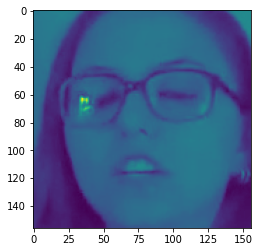

In [ ]:
DATADIR = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_train"
CATEGORIES = ['real', 'fake']
training_data = []

for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            print(img_array.shape)
            plt.imshow(img_array)
            plt.show()
            break
        break

(156, 156)


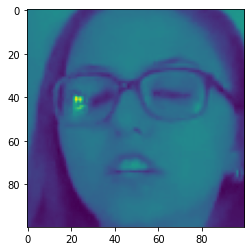

In [ ]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
print(img_array.shape)
plt.show()

In [ ]:
DATADIR = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_train"
CATEGORIES = ['real', 'fake']
training_data = []
IMG_SIZE = 100

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        print(class_num)
        print(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

0
real
1
fake


In [ ]:
print(len(training_data))

26206


In [ ]:
import random
random.shuffle(training_data)

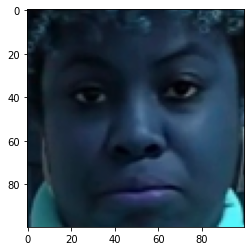

1
(100, 100, 3)


In [ ]:
plt.imshow(training_data[0][0])
plt.show()
print(training_data[0][1])
print(training_data[0][0].shape)

In [ ]:
CATEGORIES.index(category)

0

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [ ]:
print(X.shape)

(26206, 100, 100, 3)


In [ ]:
import pickle

pickle_out = open('XColorTrain.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('yColorTrain.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
DATADIR = r"C:\Users\adria\Desktop\Praca Magisterska\kaggle-challenge\data_to_test"
CATEGORIES = ['real', 'fake']
training_data = []
IMG_SIZE = 100

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        print(class_num)
        print(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

0
real
1
fake


In [ ]:
print(len(training_data))

5064


In [ ]:
import random
random.shuffle(training_data)

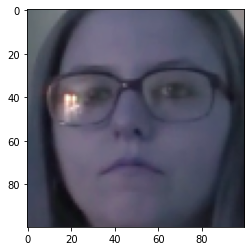

0
(100, 100, 3)


In [ ]:
plt.imshow(training_data[0][0])
plt.show()
print(training_data[0][1])
print(training_data[0][0].shape)

In [ ]:
CATEGORIES.index(category)

0

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [ ]:
print(X.shape)

(5064, 100, 100, 3)


In [ ]:
import pickle

pickle_out = open('XColorTest.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('yColorTest.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()